In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


# Lecture et prétraitement des données

In [2]:
data = pd.read_csv("placementdata.csv")
data["PlacementStatus"].value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

In [3]:
data = data.replace({'Yes': 1, 'No': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(9), object(1)
memory usage: 937.6+ KB


In [4]:
y = data["PlacementStatus"]
X = data.drop("PlacementStatus", axis=1)
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Tree

Le pourcentage de bien classés est de : 77.7 %


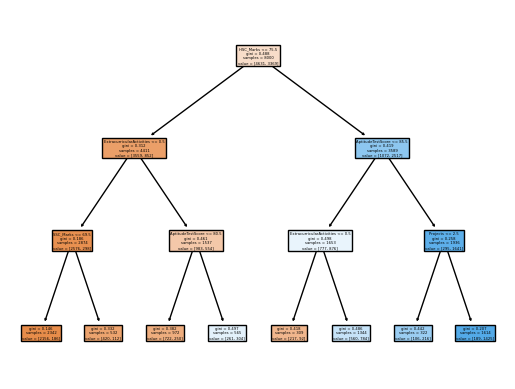

In [6]:

Tree = DecisionTreeClassifier(max_depth=3)
Tree.fit(x_train, y_train)
columns = X.columns
plot_tree(Tree, feature_names= columns, filled=True);
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, Tree.predict(x_test))*100} %")



# Random Forest

In [7]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, model_rf.predict(x_test))*100} %")


Le pourcentage de bien classés est de : 79.14999999999999 %


In [8]:
pd.DataFrame(confusion_matrix(y_test, model_rf.predict(x_test)),
             index = ["Placed_données", "NotPlaced_données"],
             columns = ["Placed_predit", "NotPlaced_predit"])

,Placed_predit,NotPlaced_predit
Placed_données,976,196
NotPlaced_données,221,607


# Neural Network

In [9]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=42, activation='relu')
model_mlp.fit(x_train, y_train)

# Prédictions sur les données de test
predictions_mlp = model_mlp.predict(x_test)

# Évaluation de l'efficacité du modèle
accuracy_mlp = accuracy_score(y_test, predictions_mlp)
print(f'Test accuracy pour MLPclassifier: {accuracy_mlp}')

Test accuracy pour MLPclassifier: 0.741
